# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
dataset_inisiasi_df = pd.read_csv("https://raw.githubusercontent.com/Evameivina/proyekbelajarpemula/refs/heads/main/dataset_inisiasi.csv")
dataset_inisiasi_df.head()

,TransactionID,AccountID,CustomerOccupation,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,TX000001,AC00128,Doctor,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,81,1,5112.21,2024-11-04 08:08:08,0
1,TX000002,AC00455,Doctor,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,141,1,13758.91,2024-11-04 08:09:35,2
2,TX000003,AC00019,Student,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,56,1,1122.35,2024-11-04 08:07:04,1
3,TX000004,AC00070,Student,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,25,1,8569.06,2024-11-04 08:09:06,0
4,TX000005,AC00411,Student,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,198,1,7429.40,2024-11-04 08:06:39,0


In [3]:
def encode_object_columns(dataframe):
    label_encoders = {}
    for col in dataframe.select_dtypes(include='object').columns:
        encoder = LabelEncoder()
        dataframe[col] = encoder.fit_transform(dataframe[col])
        label_encoders[col] = encoder
    return dataframe, label_encoders

df, label_encoders = encode_object_columns(dataset_inisiasi_df)

In [4]:
print(dataset_inisiasi_df.head())

   TransactionID  AccountID  CustomerOccupation  TransactionAmount  \
0              0        126                   0              14.09   
1              1        450                   0             376.24   
2              2         18                   3             126.29   
3              3         68                   3             184.50   
4              4        406                   3              13.45   

   TransactionDate  TransactionType  Location  DeviceID  IP Address  \
0              684                1        36       365         186   
1             1192                1        15        50          82   
2             1276                1        23       229         343   
3              823                1        33       182         300   
4             1959                0         1       298         501   

   MerchantID  Channel  CustomerAge  TransactionDuration  LoginAttempts  \
0          14        0           70                   81              1   
1 

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
# Pisahkan fitur dan target
X = df.drop(columns=['Cluster'])
y = df['Cluster']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalisasi fitur setelah split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dataset setelah proses split dan normalisasi:\n")
print(f"{'Dataset':<20} {'Features':<15} {'Labels':<15}")
print(f"{'-'*45}")
print(f"{'Training Set':<20} {X_train_scaled.shape[0]:<15} {y_train.shape[0]:<15}")
print(f"{'Testing Set':<20} {X_test_scaled.shape[0]:<15} {y_test.shape[0]:<15}")

Dataset setelah proses split dan normalisasi:

Dataset              Features        Labels         
---------------------------------------------
Training Set         2009            2009           
Testing Set          503             503            


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [6]:
models = {
    "SVM": SVC(),
    "K-Neighbors": KNeighborsClassifier()
}

Dalam proyek ini, saya menggunakan dua algoritma klasifikasi:
* **K-Nearest Neighbors (KNN)**
* **Support Vector Machine (SVM)**

**KNN** bekerja dengan mencari sejumlah tetangga terdekat dari data baru, lalu menentukan kelas berdasarkan mayoritas label tetangga tersebut.
Sedangkan **SVM** berusaha mencari garis pemisah terbaik yang memisahkan kelas-kelas dalam data, sehingga margin antar kelas menjadi sejauh mungkin.
Keduanya digunakan untuk membandingkan performa dalam memprediksi hasil klasifikasi dari dataset yang sudah diproses.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

SVM - Accuracy: 0.9940
K-Neighbors - Accuracy: 0.9841


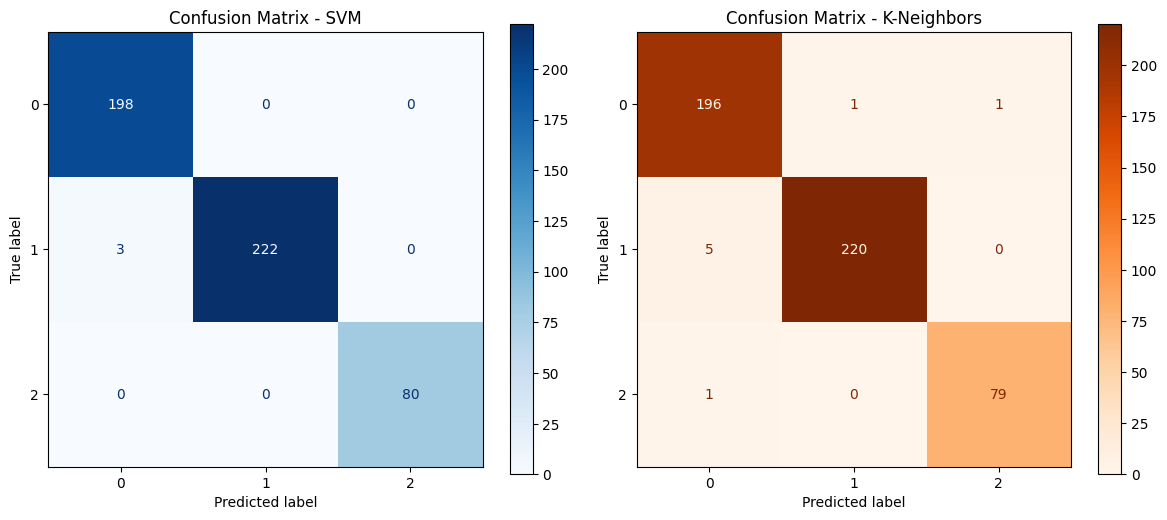

In [7]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='weighted'),
        "recall": recall_score(y_test, y_pred, average='weighted'),
        "f1": f1_score(y_test, y_pred, average='weighted'),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

def plot_confusion_matrix(models_metrics):
    fig, axes = plt.subplots(1, len(models_metrics), figsize=(12, 5))
    for i, (name, metrics) in enumerate(models_metrics.items()):
        cm = metrics["confusion_matrix"]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=axes[i], cmap='Blues' if name == "SVM" else 'Oranges')
        axes[i].set_title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()

def main(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    models_metrics = {}
    for name, model in models.items():
        metrics = evaluate_model(model, X_train, y_train, X_test, y_test)
        models_metrics[name] = metrics
        print(f"{name} - Accuracy: {metrics['accuracy']:.4f}")
    plot_confusion_matrix(models_metrics)

main(X, y)

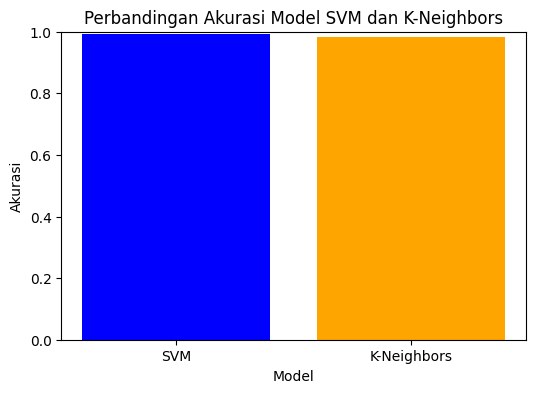

Perbandingan Performa Model:
SVM memiliki akurasi lebih tinggi.


In [8]:
accuracy_svm = 0.9940
accuracy_knn = 0.9841

# Visualisasi Perbandingan Akurasi
models = ["SVM", "K-Neighbors"]
accuracies = [accuracy_svm, accuracy_knn]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.xlabel("Model")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Model SVM dan K-Neighbors")
plt.show()

# Analisis Perbandingan Model
print("Perbandingan Performa Model:")
if accuracy_knn > accuracy_svm: # Changed accuracy_rf to accuracy_knn
    print("K-Neighbors memiliki akurasi lebih tinggi.") # Changed message to reflect K-Neighbors
elif accuracy_svm > accuracy_knn: # Changed accuracy_rf to accuracy_knn
    print("SVM memiliki akurasi lebih tinggi.")
else:
    print("Kedua model memiliki akurasi yang sama.")

Saya menguji dua algoritma klasifikasi, yaitu **K-Neighbors (KNN)** dan **Support Vector Machine (SVM),** untuk melihat performanya dalam mengklasifikasikan data. Hasilnya, **SVM** memberikan akurasi yang sangat tinggi, yaitu 99.40%, menunjukkan bahwa model ini sangat efektif dalam mengenali pola data. Di sisi lain, **KNN** menghasilkan akurasi 98.41%, yang sedikit lebih rendah namun masih tergolong sangat baik. Meskipun selisihnya tidak terlalu besar, SVM sedikit lebih unggul dalam hal akurasi.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [9]:
param_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [3, 4, 5],
}

random_search_svm = RandomizedSearchCV(
    SVC(random_state=42),
    param_distributions=param_svm,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search_svm.fit(X_train, y_train)
best_svm = random_search_svm.best_estimator_

print("Best Hyperparameters for SVM:")
print(random_search_svm.best_params_)


Best Hyperparameters for SVM:
{'kernel': 'poly', 'gamma': 'scale', 'degree': 3, 'C': 100}


In [10]:
param_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50],
    'p': [1, 2]  # 1 for Manhattan, 2 for Euclidean
}

random_search_knn = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_knn,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search_knn.fit(X_train, y_train)
best_knn = random_search_knn.best_estimator_

print("Best Hyperparameters for KNN:")
print(random_search_knn.best_params_)

Best Hyperparameters for KNN:
{'weights': 'distance', 'p': 1, 'n_neighbors': 7, 'leaf_size': 20, 'algorithm': 'auto'}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [11]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

#### **Berikut adalah hasil dari hyperparameter tuning dan rekomendasi untuk langkah selanjutnya, menggunakan model SVM dan KNN.**

**Hasil Hyperparameter Tuning:**

**SVM:**

* Kernel: Polynomial (polynomial)

* Gamma: Scale

* Degree: 3

* C: 100

**KNN:**

* Weights: Distance

* p: 1 (Manhattan distance)

* n_neighbors: 7

* Leaf size: 20

* Algorithm: Auto

**SVM:**

* Dengan menggunakan kernel polynomial, SVM dapat menangani data yang lebih kompleks dan tidak linier dengan lebih baik. Parameter C yang lebih besar membuat model menjadi lebih sensitif terhadap kesalahan, sehingga model menjadi lebih ketat dan akurasi meningkat.

* Pengaturan gamma ke scale membantu model untuk lebih peka terhadap data yang dekat dengan batas klasifikasi, yang dapat meningkatkan akurasi prediksi.

**KNN:**

* Dengan menggunakan Manhattan distance (p=1), KNN lebih cocok untuk data yang memiliki hubungan antar fitur yang tidak linier. Menetapkan jumlah tetangga sebanyak 7 memberikan keseimbangan yang baik antara overfitting dan underfitting, menjaga model tetap umum dan tidak terlalu spesifik.

* Pengaturan weights ke distance memberikan bobot lebih besar pada tetangga yang lebih dekat, hal ini berguna ketika distribusi data tidak merata.

### *Rekomendasi Langkah Lanjutan:*

**Mengumpulkan Data Tambahan:**

* Jika dataset terlalu kecil atau tidak seimbang, model mungkin kesulitan untuk belajar, terutama pada kelas yang jarang muncul. Menambah data, terutama untuk kelas yang lebih jarang, bisa membantu meningkatkan performa model.

**Coba Algoritma Lain:**

* Jika KNN tidak memberikan hasil yang memuaskan, cobalah menggunakan algoritma lain seperti Random Forest atau XGBoost, yang lebih kuat dalam menangani data berisik dan fitur yang kompleks.

* Untuk SVM, jika hasilnya masih kurang baik, Neural Networks (Deep Learning) bisa menjadi pilihan, terutama jika dataset yang dimiliki cukup besar dan kompleks.

**Tuning Hyperparameter:**

* KNN: Untuk menghindari overfitting, coba eksperimen dengan nilai k yang lebih optimal. Salah satu cara yang dapat digunakan adalah dengan menggunakan GridSearch untuk mencari nilai k terbaik yang sesuai dengan data.

* SVM: Cobalah berbagai jenis kernel (seperti linear, polynomial, atau RBF) dan sesuaikan nilai C dan gamma untuk mencari kombinasi yang memberikan hasil terbaik tanpa menyebabkan overfitting.